##### Experiment 5 : gamma ray mass absorption constant

In [48]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# the initial data
background_count = 72
background_time = 300
bc_freq = background_count/background_time

# fitting function
def fitfunc(x,I0,a,b):
    return I0*np.exp(-a*x)+b

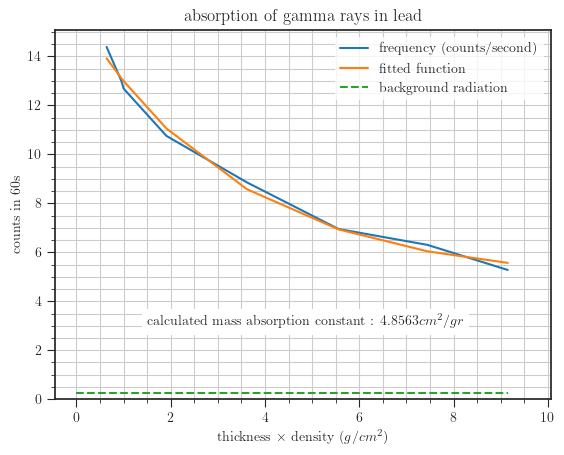

In [49]:
# Pb calculation

# reading data
pb_data = np.genfromtxt('exp5_data_pb.csv',delimiter=',')

# parsing data
pb_thickness = pb_data[:,1]
pb_frequncy = pb_data[:,2]/pb_data[:,0]

pb_params, cov = curve_fit(fitfunc,pb_thickness,pb_frequncy)

plt.style.use(plt.style.available[25])
plt.rcParams['text.usetex'] = True
plt.plot(pb_thickness,pb_frequncy,label=r'\textrm{frequency (counts/second)}')
plt.plot(pb_thickness,fitfunc(pb_thickness,*pb_params),label=r"\textrm{fitted function}")
plt.hlines(bc_freq,0,1*pb_thickness.max(),"C2","--",label=r'\textrm{background radiation}')

plt.title(r'\textrm{absorption of gamma rays in lead}')
plt.xlabel(r'\textrm{thickness} $\times$ \textrm{density} $(g/cm^2)$')
plt.ylabel(r'\textrm{counts in 60s}')
plt.text(1.5,3,r'\textrm{calculated mass absorption constant :} $ %.4f cm^2/gr$' % pb_params[2],
         bbox={'facecolor':'white','ec':'none'})
plt.ylim(bottom=0)
plt.xlim(right=1.1*pb_thickness.max())
plt.minorticks_on()
plt.grid(True,which='both')
lg = plt.legend(frameon=True)
lg.get_frame().set_linewidth(0.0)
plt.savefig('exp5_plot_pb.jpg',dpi=500)
plt.show()

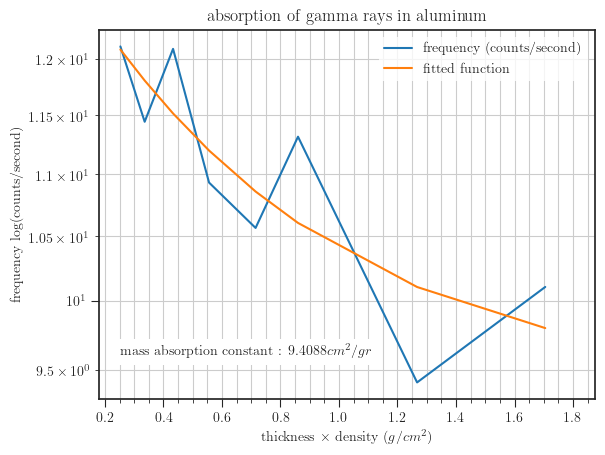

In [47]:
# Al calculation

# reading data
al_data = np.genfromtxt('exp5_data_al.csv',delimiter=',')

# parsing data
al_thickness = al_data[:,1]/1000
al_frequncy = al_data[:,2]/al_data[:,0]

al_params, cov = curve_fit(fitfunc,al_thickness[4:],al_frequncy[4:])

plt.style.use(plt.style.available[25])
plt.rcParams['text.usetex'] = True
plt.plot(al_thickness[4:],al_frequncy[4:],label=r'\textrm{frequency (counts/second)}')
plt.plot(al_thickness[4:],fitfunc(al_thickness[4:],*al_params),label=r"\textrm{fitted function}")
#plt.hlines(bc_freq,0,1*al_thickness.max(),"C2","--",label=r'\textrm{background radiation}')

plt.title(r'\textrm{absorption of gamma rays in aluminum}')
plt.xlabel(r'\textrm{thickness} $\times$ \textrm{density} $(g/cm^2)$')
plt.ylabel(r'\textrm{frequency log(counts/second)}')
plt.text(0.25,9.6,r'\textrm{mass absorption constant :} $ %.4f cm^2/gr$' % al_params[2],
         bbox={'facecolor':'white','ec':'none'})
plt.yscale('log')
plt.xlim(right=1.1*al_thickness.max())
plt.minorticks_on()
plt.grid(True,which='both')
lg = plt.legend(frameon=True)
lg.get_frame().set_linewidth(0.0)
plt.savefig('exp5_plot_al.jpg',dpi=500)
plt.show()